# Wine Classification Project

This project focuses on the application of machine learning techniques for the classification of wines. Utilizing a dataset that encompasses various physicochemical properties of wines, I aim to build a predictive model that can accurately distinguish between different types of wines. The goal is to not only develop an effective classification model but also to draw insightful conclusions about the factors that influence wine classification. This notebook documents the entire process, from data analysis to model evaluation, offering a comprehensive view of the machine learning workflow in the context of wine classification.

### Libraries

In [6]:

from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = load_wine()

### Data comprehension

In [8]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

In [10]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [11]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [36]:
# Search for missing, NA and null values
(df.isnull() | df.empty | df.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

The Wine recognition dataset comprises 178 instances, each with 13 numeric (float64), predictive attributes and a target class, with no null values. The attributes include various physicochemical properties like Alcohol, Malic Acid, Ash, and others. There are three wine classes in the dataset. 
The statistical summary reveals varying ranges and distributions across different features. For instance, features like 'Proline' have a wide range, whereas others like 'Nonflavanoid phenols' have a narrower spread.

## EDA

First, I'm going to visualize the target distribution and balance

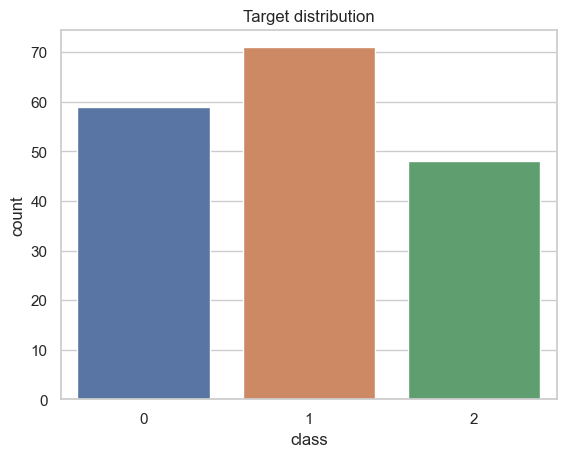

In [27]:
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(x=df['class'])
plt.title('Target distribution')
plt.show()

The countplot showed the number of instances for each wine class. Assuming the distribution was relatively balanced, this suggests that each class is adequately represented in the dataset.

Now, I'll do a pairplot to have a better sense of the relationship beetween the attributes.

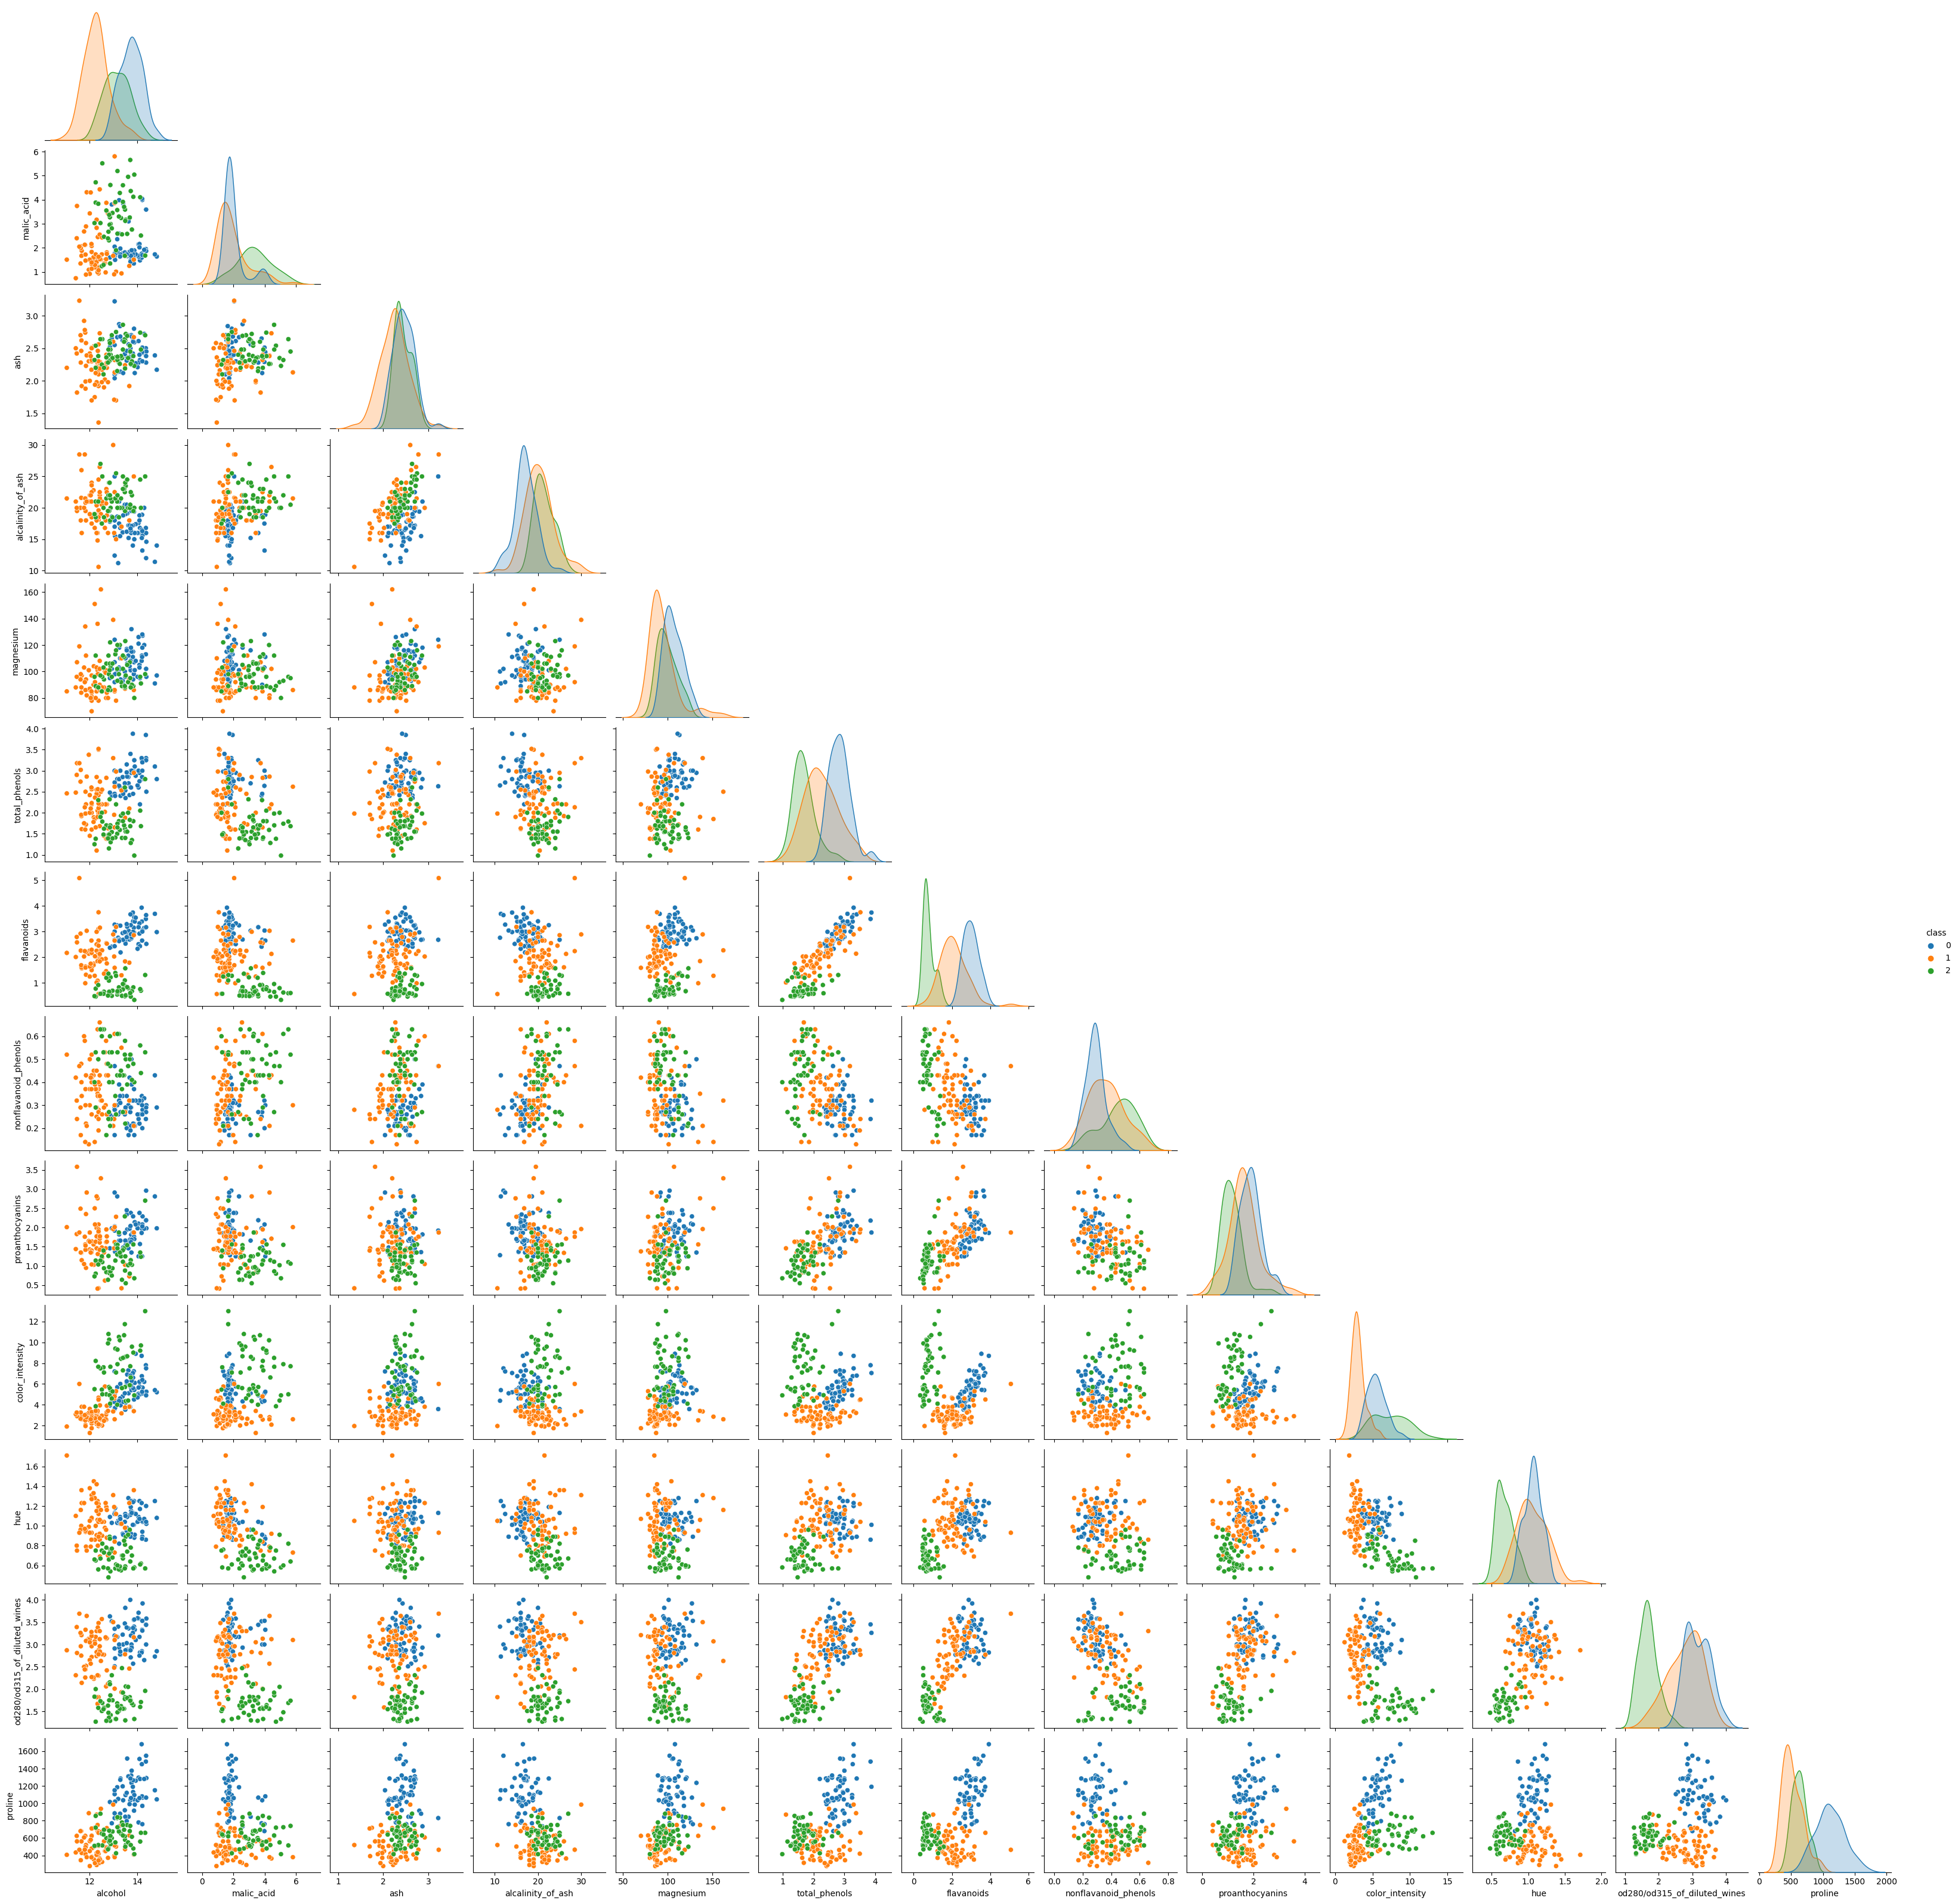

In [14]:
sns.pairplot(df, 
             hue='class', 
             palette="tab10", 
             corner=True)

plt.show()

I see that some features separate quite well the classes. For example, Proline seems to be a quite explicative variable itself, especially for wine 0 (blue dots).
Color intensity seems to bee especially for wine 1 (orange dots). Phenols and flavanoids seems to be good to separate 0 (blue dots) and 2 (green dots) wines.

I could eventually apply dimensionality reduction (for example with PCA we could reduce feature minimizing the loss of information).

To verify correlation between features we'll also plot a heatmap of the linear correlations 

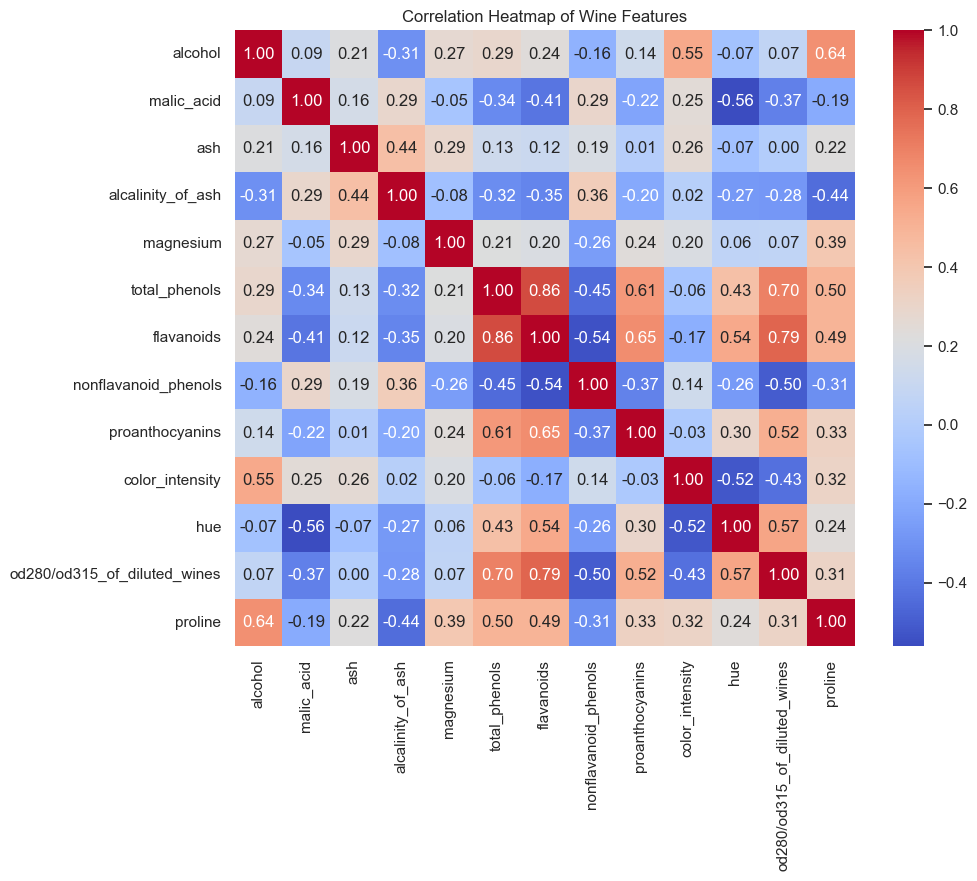

In [38]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.iloc[:,:-1].corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Features')
plt.show()

Some features have quite high linear correaltion:

* flavanoids / total phenols 0.86
* flavanoids / od280/od315_of_diluted_wines 0.79

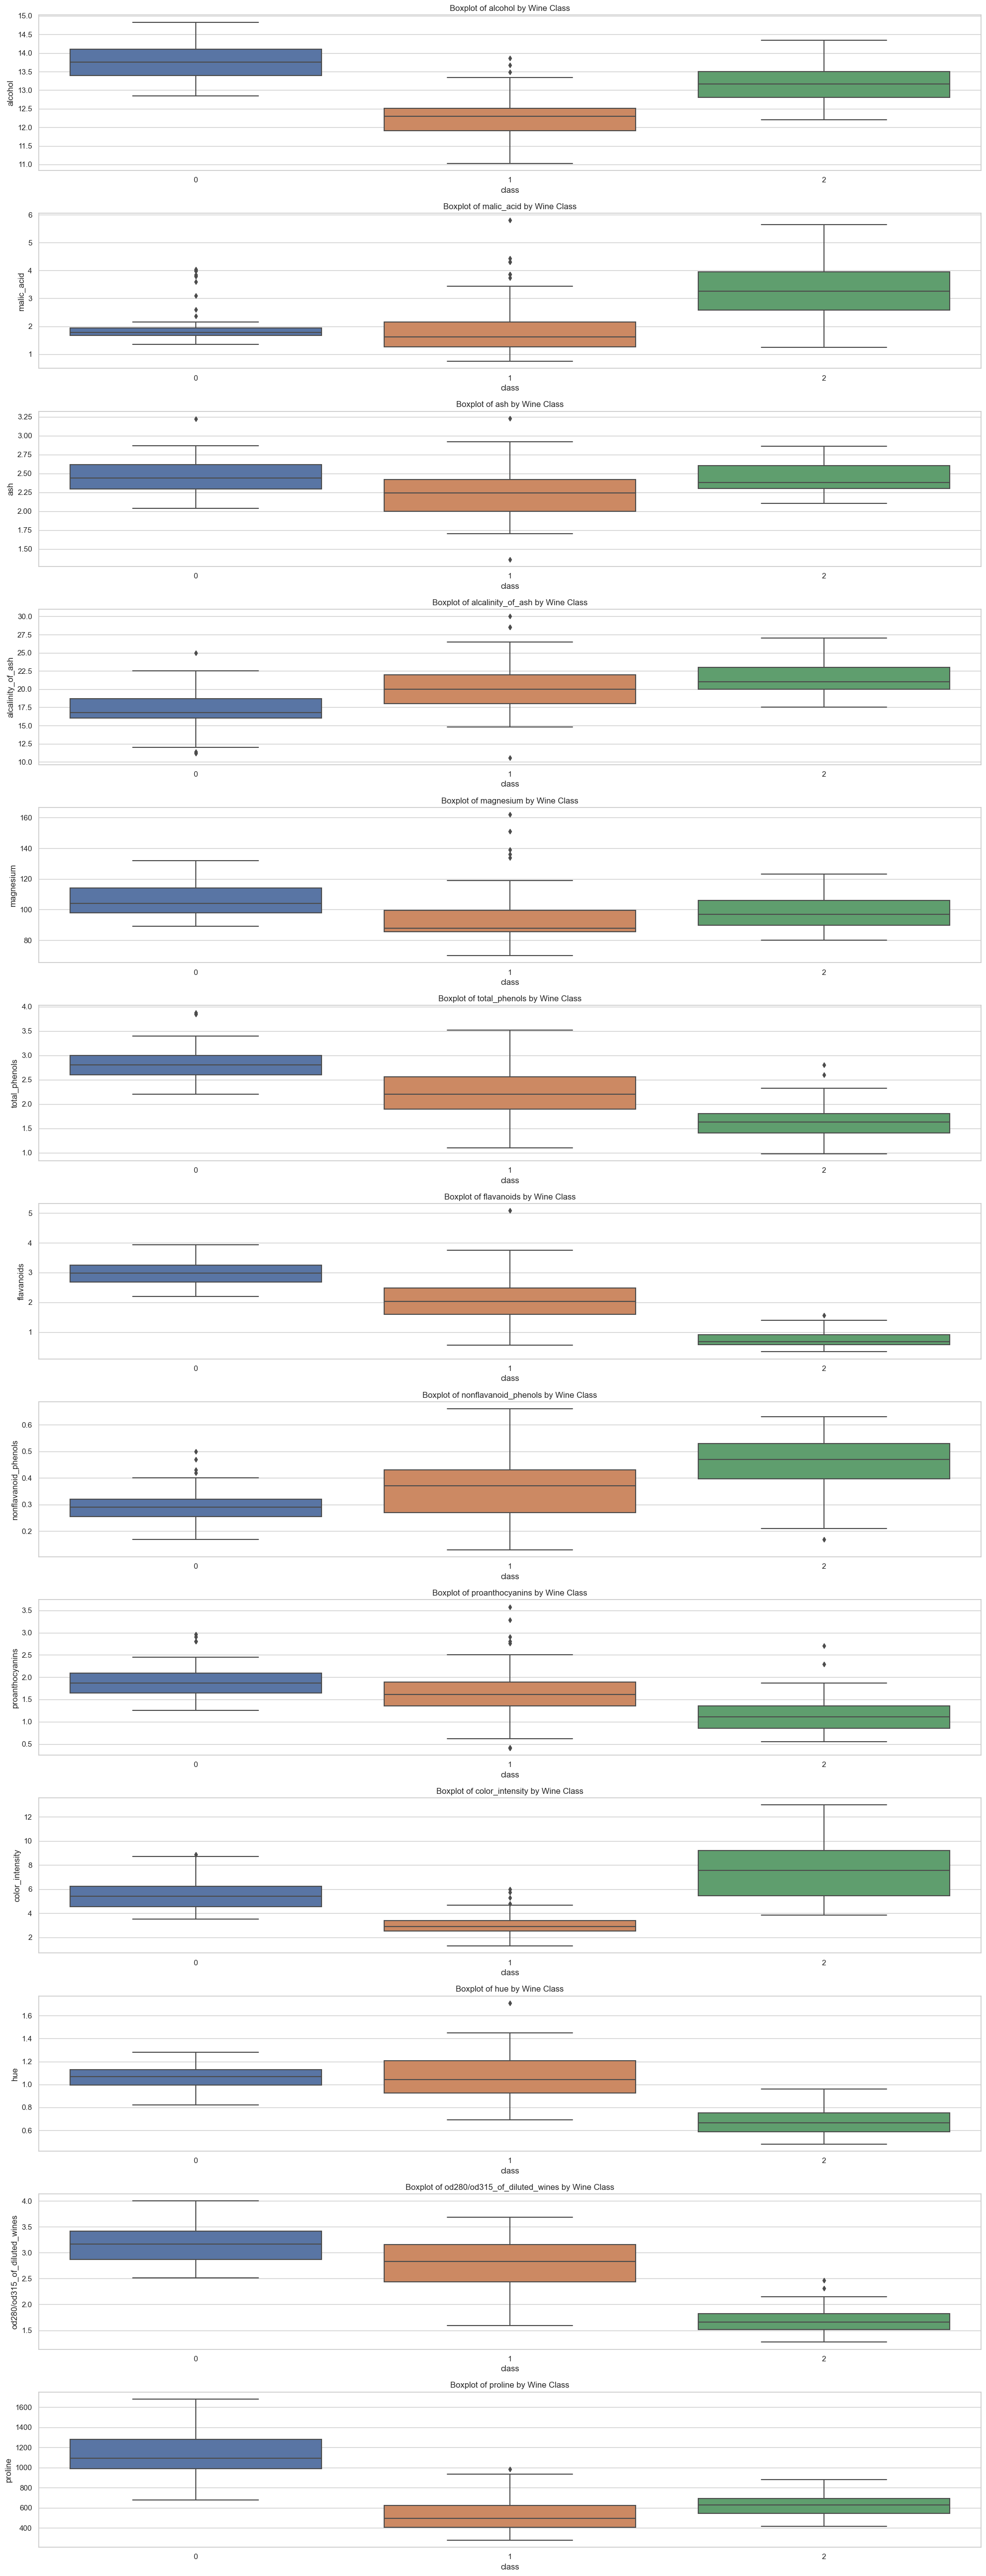

In [52]:
# Boxplots. 
# Number of features (excluding the target)
num_features = len(df.columns) - 1
# Adjusted the figsize for vertical layout
plt.figure(figsize=(20, 4 * num_features))  

# Creating a boxplot for each feature
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1) 
    sns.boxplot(x=df['class'], y=df.columns[i], data=df)
    plt.title(f'Boxplot of {df.columns[i]} by Wine Class')
    plt.tight_layout()

plt.show()

From above boxplot we can see that features like Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity and Hue have outliers.
I'm gonna do a statistical analysis of this features.

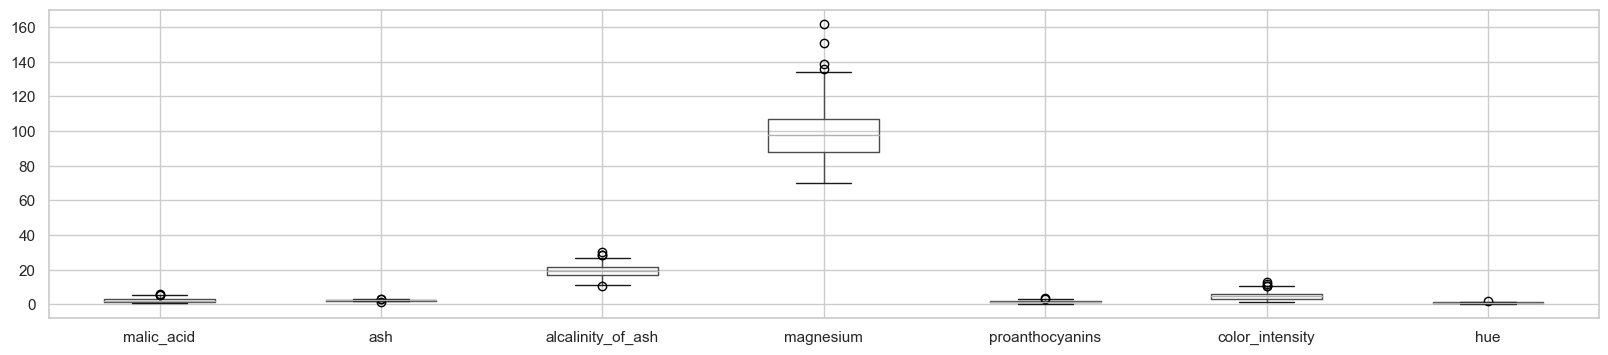

(       malic_acid         ash  alcalinity_of_ash   magnesium  proanthocyanins  \
 count  178.000000  178.000000         178.000000  178.000000       178.000000   
 mean     2.336348    2.366517          19.494944   99.741573         1.590899   
 std      1.117146    0.274344           3.339564   14.282484         0.572359   
 min      0.740000    1.360000          10.600000   70.000000         0.410000   
 25%      1.602500    2.210000          17.200000   88.000000         1.250000   
 50%      1.865000    2.360000          19.500000   98.000000         1.555000   
 75%      3.082500    2.557500          21.500000  107.000000         1.950000   
 max      5.800000    3.230000          30.000000  162.000000         3.580000   
 
        color_intensity         hue  
 count       178.000000  178.000000  
 mean          5.058090    0.957449  
 std           2.318286    0.228572  
 min           1.280000    0.480000  
 25%           3.220000    0.782500  
 50%           4.690000    0.965

In [53]:
# Selecting the specified features for statistical analysis
features = ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
df_selected = df[features]

# Displaying basic statistics and boxplots for the selected features
stats = df_selected.describe()
boxplot = df_selected.boxplot(figsize=(20, 4))

stats, plt.show()

## Modeling

In [16]:
X = df.iloc[:,:-1]
y = df['class']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42, stratify=y)

In [82]:
# Analyzing the distributions to make sure the split is representative
def analyze_distributions(full_set, train_set, test_set, column_name):
    # Plotting the distributions
    plt.figure(figsize=(15, 5))

    # Full dataset
    plt.subplot(1, 3, 1)
    sns.histplot(full_set, kde=True)
    plt.title(f'Full Dataset - {column_name}')

    # Training set
    plt.subplot(1, 3, 2)
    sns.histplot(train_set, kde=True)
    plt.title(f'Training Set - {column_name}')

    # Test set
    plt.subplot(1, 3, 3)
    sns.histplot(test_set, kde=True)
    plt.title(f'Test Set - {column_name}')

    plt.tight_layout()
    plt.show()

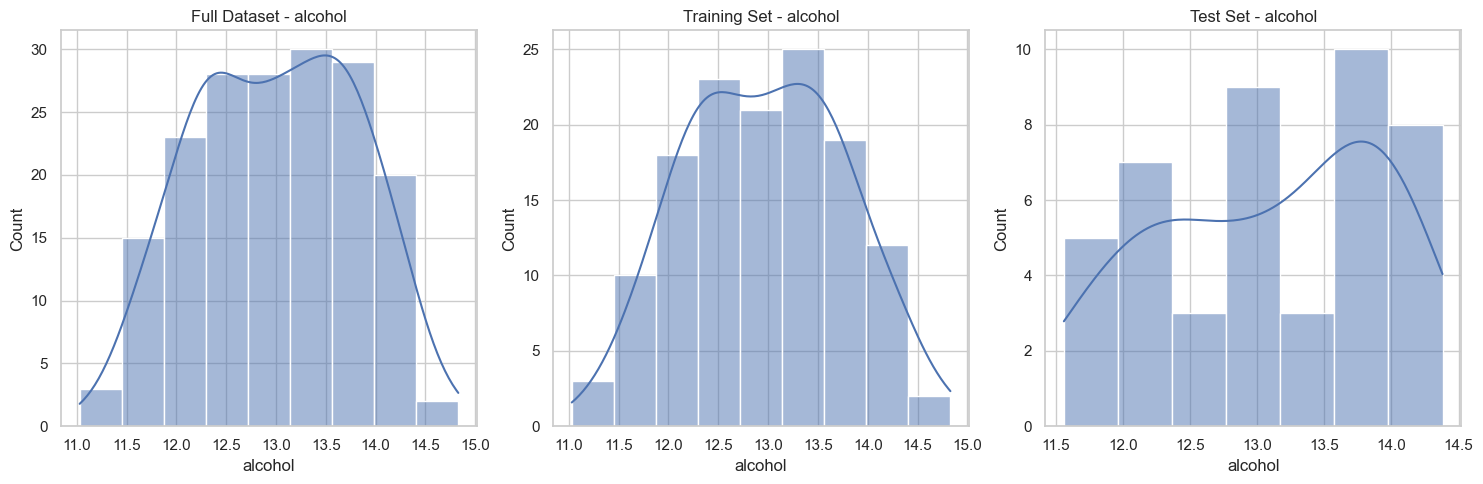

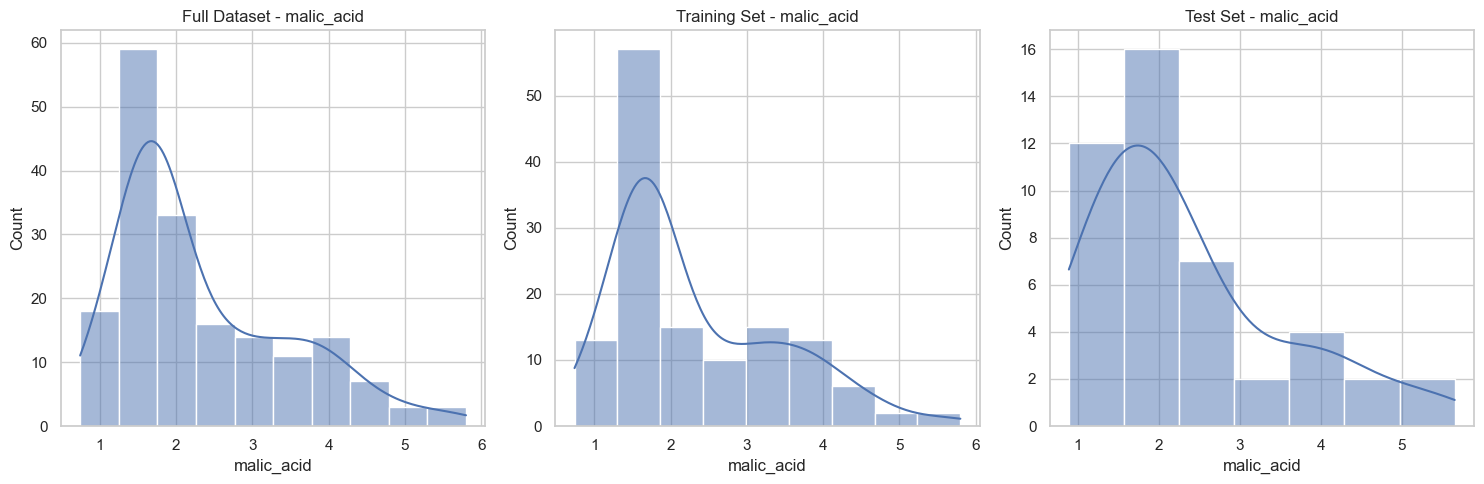

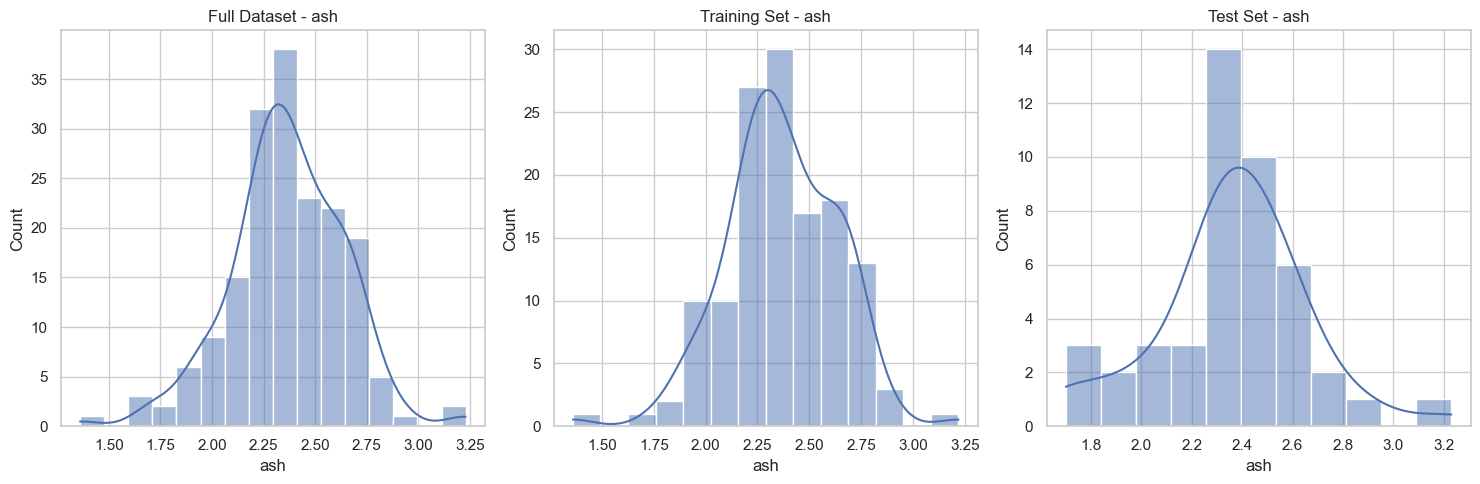

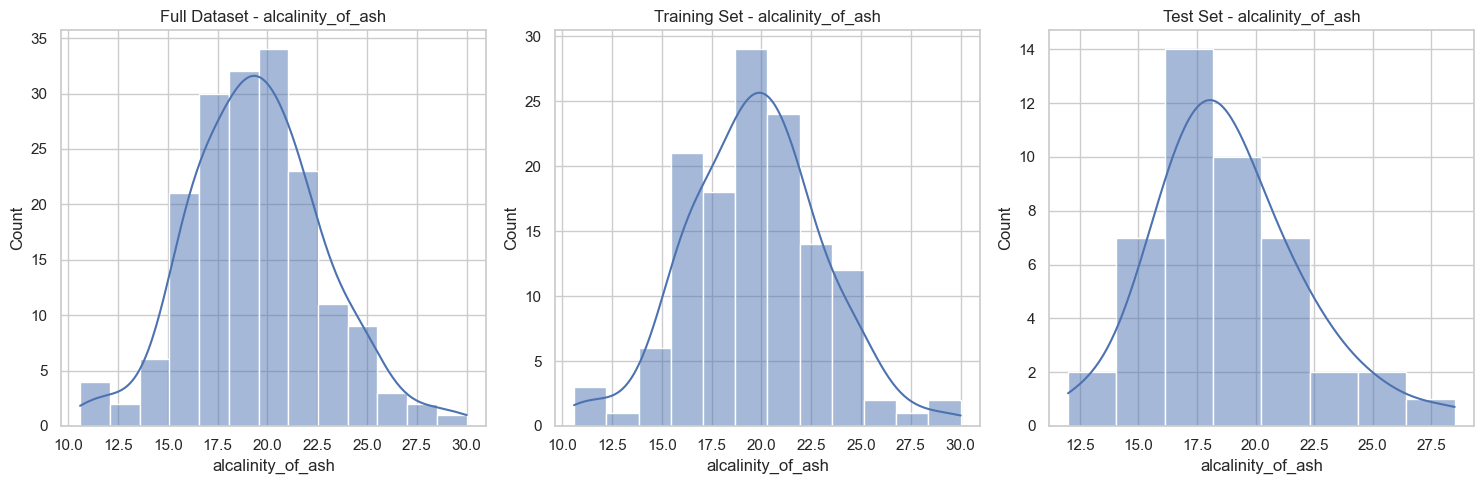

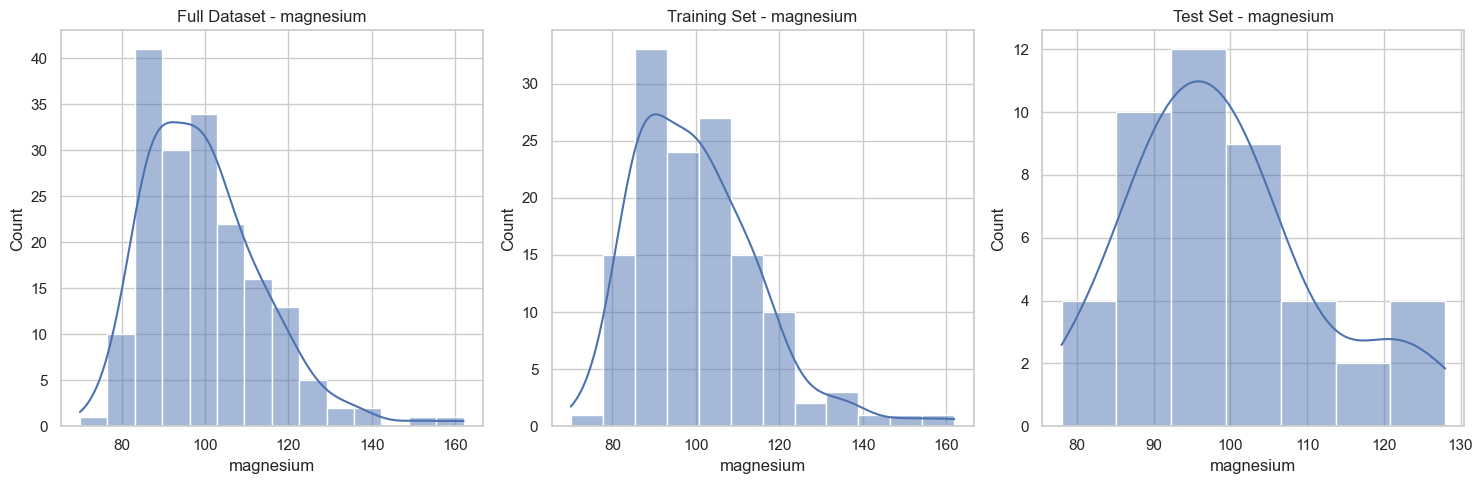

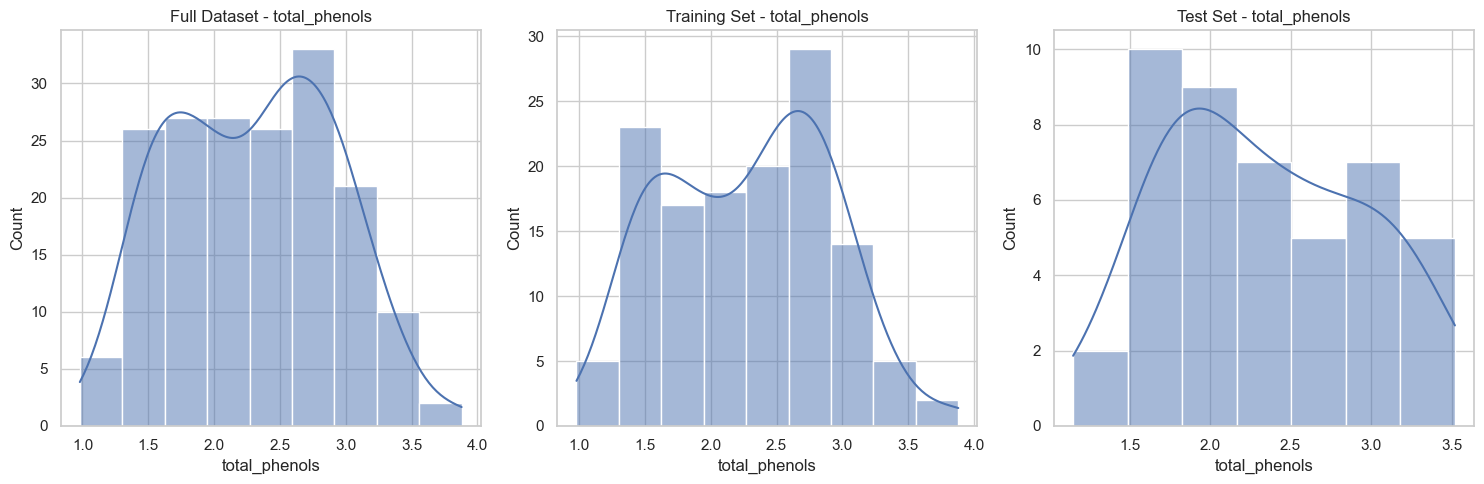

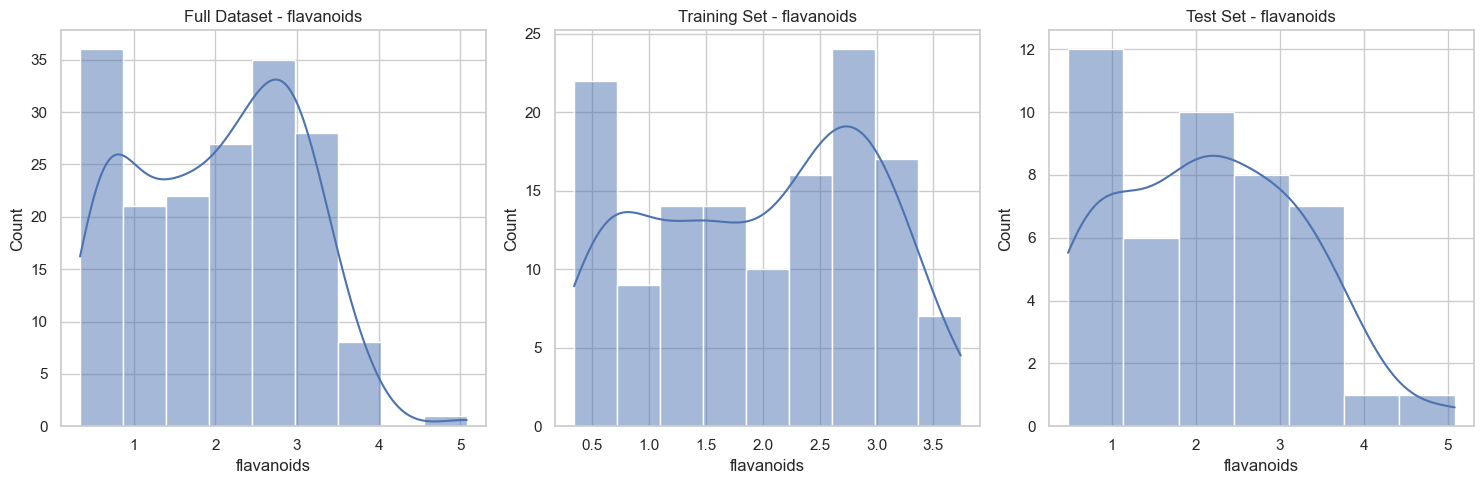

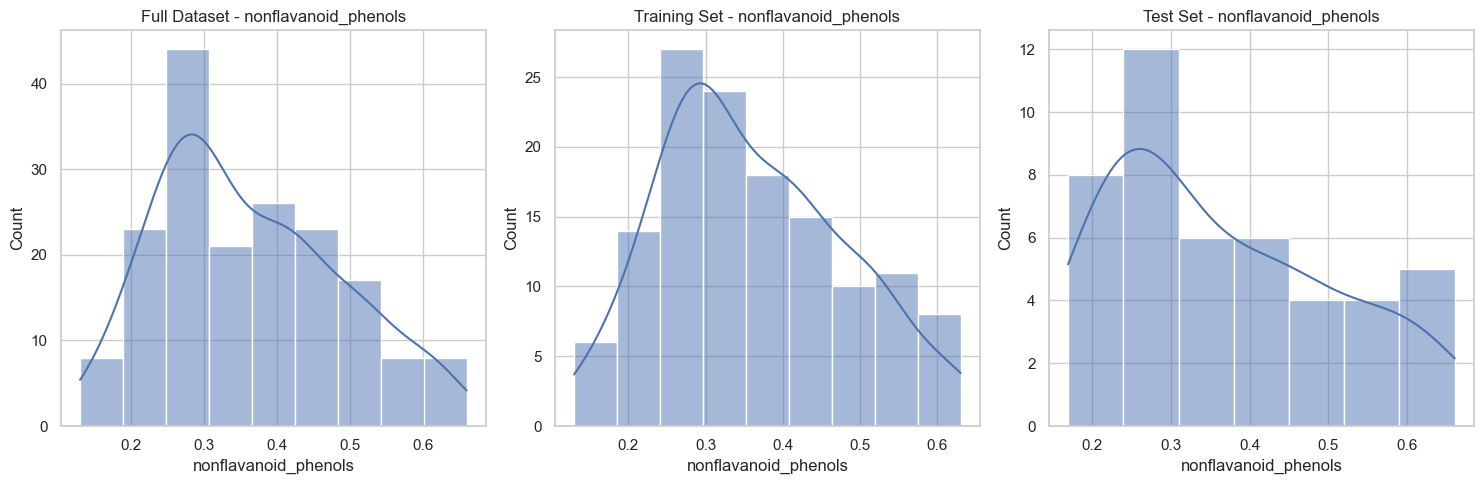

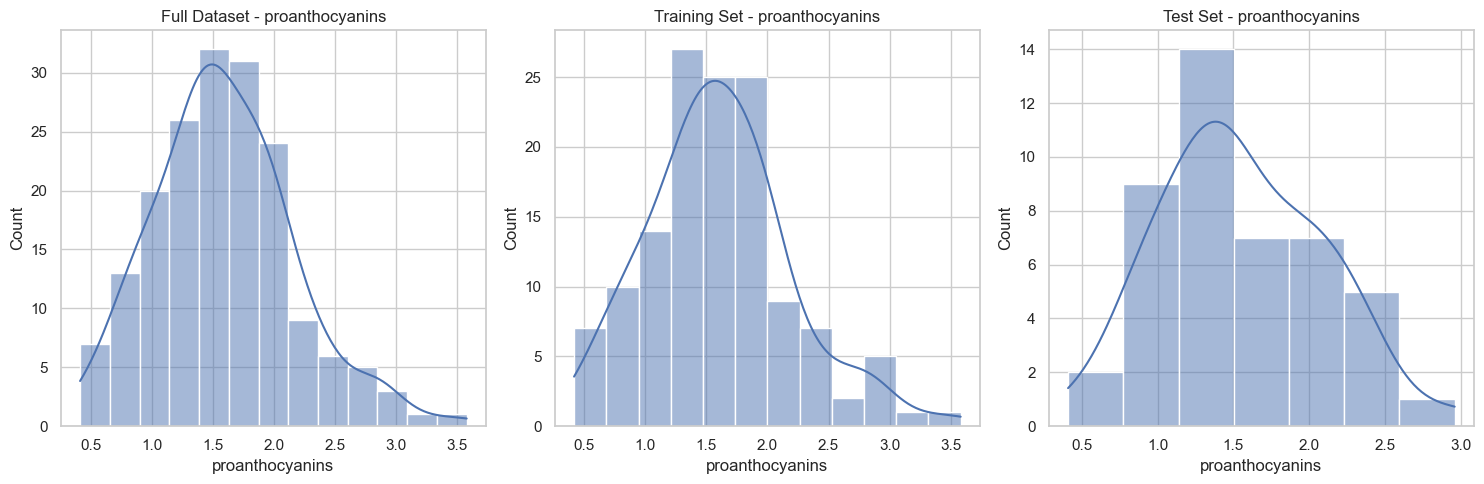

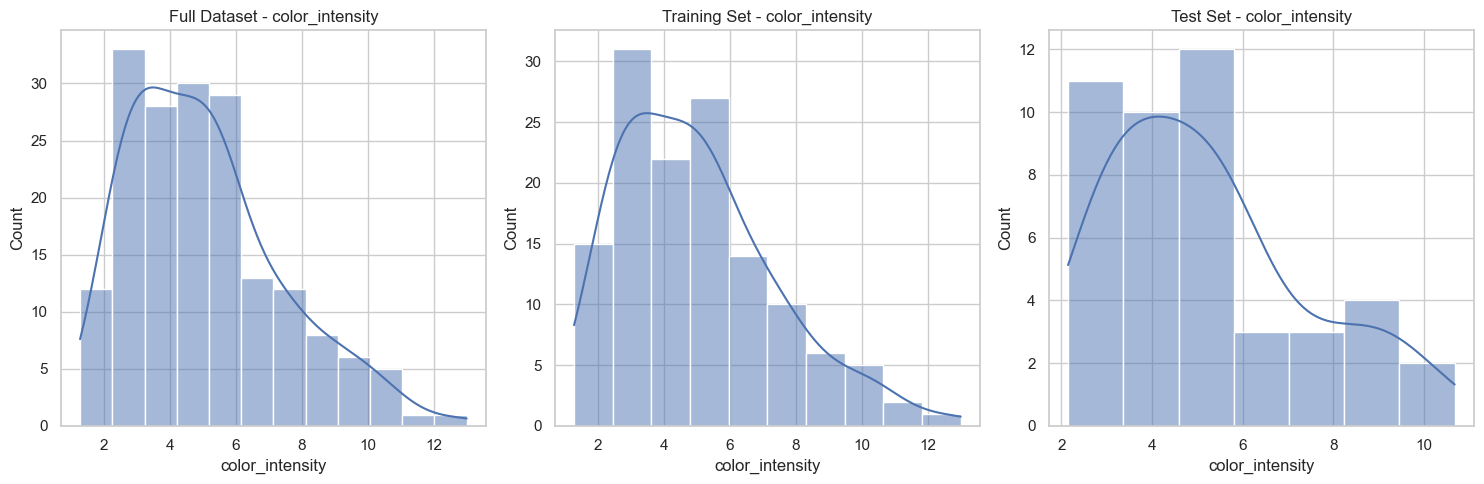

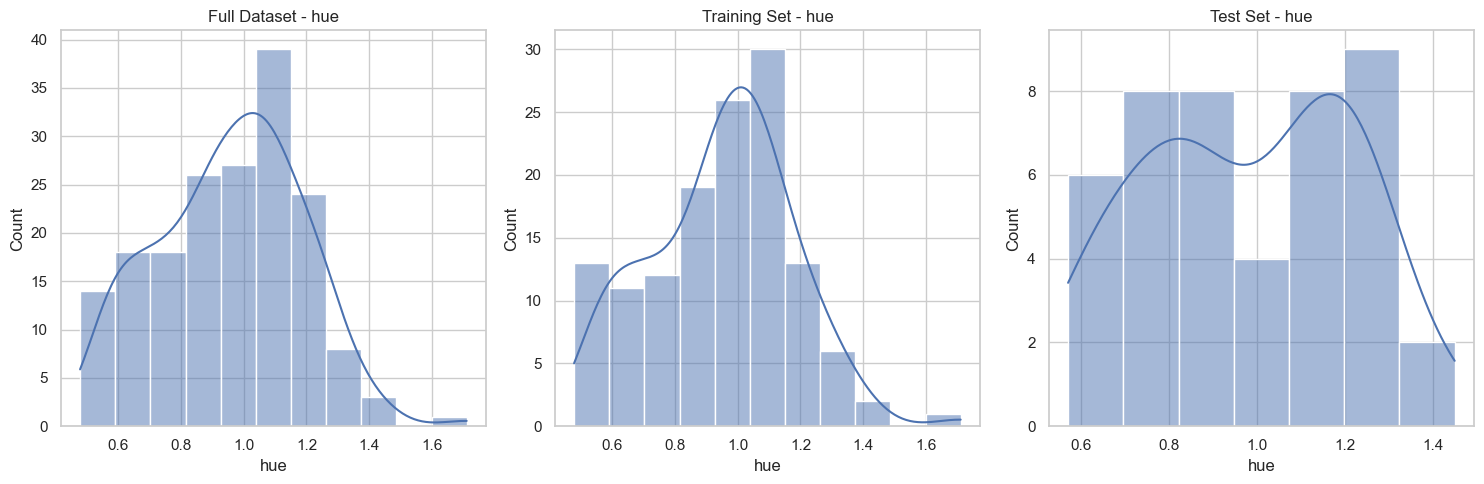

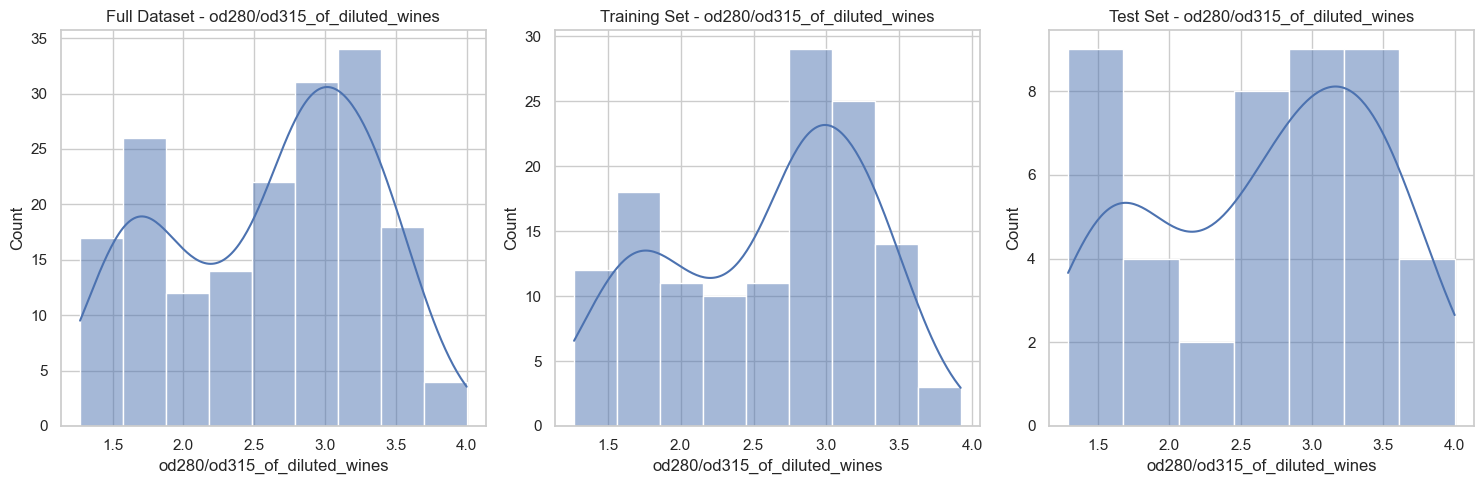

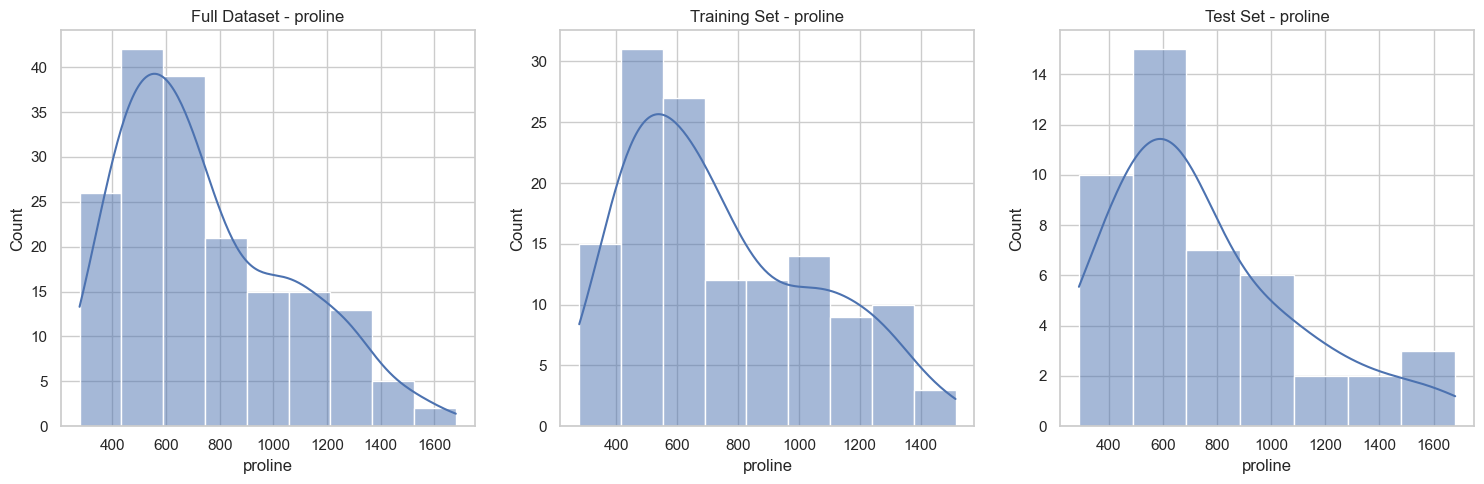

In [89]:
feature_names = X.columns
for feature in feature_names:
     analyze_distributions(df[feature], X_train[feature], X_test[feature], feature)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pp = Pipeline ([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
} 

gs = GridSearchCV(pp,param_grid, cv=5, scoring='accuracy', verbose=1)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [72]:
gs.best_params_

{'classifier__max_depth': None,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 50}

In [73]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_train)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[47,  0,  0],
       [ 0, 57,  0],
       [ 0,  0, 38]], dtype=int64)

In [75]:
best_model.score(X_train, y_train)

1.0

In [76]:
y_pred_test = best_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

In [77]:
best_model.score(X_test,y_test)

1.0

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



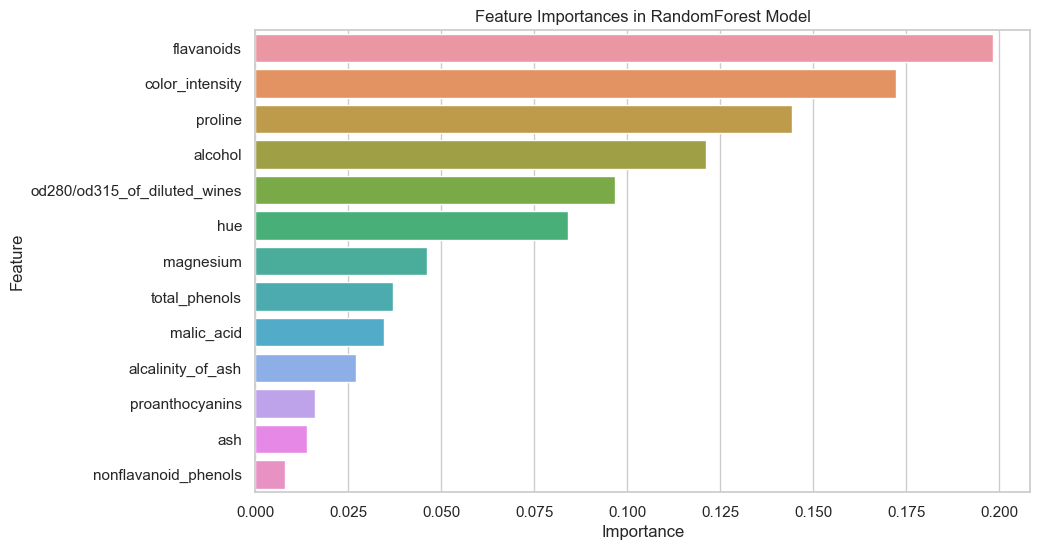

In [79]:
feature_importances = best_model.named_steps['classifier'].feature_importances_
# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

We can see that flavanoids, color intensity and proline were, in effect, good features as thought during the EDA.

I'm finnaly adding noise to assess the robustness of my model. 

In [92]:
from sklearn.utils import shuffle

# Define the noise level as a percentage of the standard deviation of the features
noise_level = 0.1

# Adding Gaussian noise
noise = np.random.normal(0, noise_level, X_train.shape)

# Create a noisy version of the training data
X_train_noisy = X_train + noise

# Since we're experimenting, we need to shuffle the noisy data to avoid any ordering bias
X_train_noisy, y_train_noisy = shuffle(X_train_noisy, y_train, random_state=42)

# Train your model on the noisy dataset
model_noisy = RandomForestClassifier(random_state=42)
model_noisy.fit(X_train_noisy, y_train_noisy)

# Compare the performance with the model trained on the original data
print(f"Original model score: {best_model.score(X_test,y_test)}")  # Replace with your original model score
print(f"Noisy model score: {model_noisy.score(X_test, y_test)}")

Original model score: 1.0
Noisy model score: 1.0


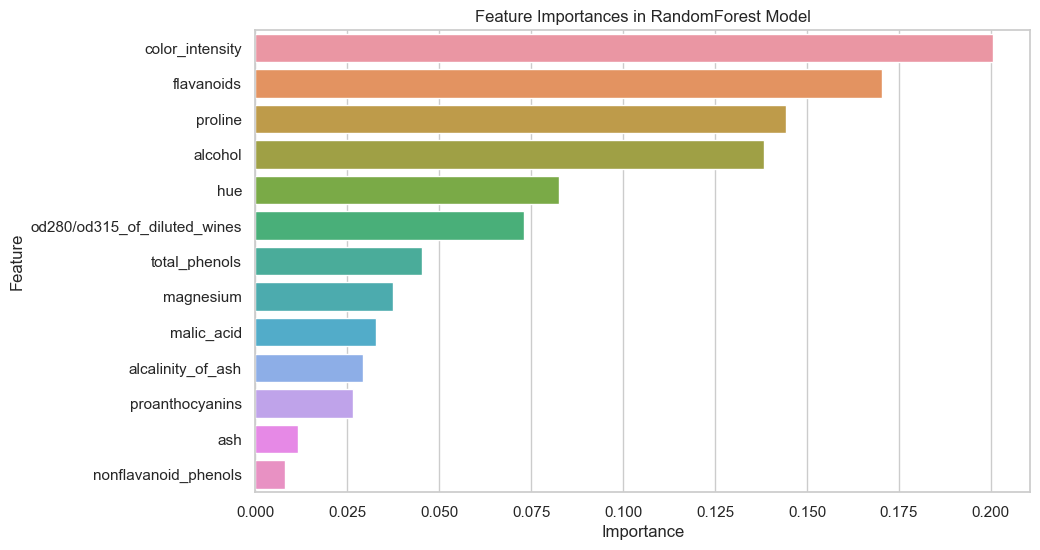

In [94]:
feature_importances_noisy = model_noisy.feature_importances_
# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train_noisy.columns, 
    'Importance': feature_importances_noisy
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

If both the original model score and the noisy model score are 1.0, and the feature importance didn't change. That suggests that your RandomForest model is quite robust to the level of noise introduced. 